In [1]:
%load_ext autoreload
%autoreload 2

In [22]:
import numpy as np
from func import link_maker
from alg import astar,min_conflict,bfs,bt_dfs
import matplotlib.pyplot as plt

In [4]:
size = 8

# init_playfield = [-1, 1, -1, -1] 
# init_playfield = [1, -1, 2, 0] 
init_playfield = [-1, 0, -1, -1, -1, -1, -1, -1] 
# init_playfield = [1, 5, 3, 4, 6, 2, 7, 0]

In [5]:
ap, b = astar(size, init_playfield, 100)
print(ap, b)
link_maker(ap)

[5, 3, 0, 4, 7, 1, 6, 2] 93


'https://lichess.org/editor/2Q5/5Q2/7Q/1Q6/3Q4/Q7/6Q1/4Q3_w_-_-_0_1?color=white'

In [40]:
from tqdm import tqdm
a_s = []
a2_s = []
mc_s = []
N = 1000
for _ in tqdm(range(N)):
    init_playfield = list(np.random.randint(0, size, size))
    a_playfield, a_breaker = astar(size, init_playfield, 100)
    # a2_playfield, a2_breaker = astar(size, init_playfield, 100, kflag = True)
    mc_playfield, mc_breaker = min_conflict(init_playfield, size, 100)
    a_s.append(a_breaker)
    # a2_s.append(a2_breaker)
    mc_s.append(mc_breaker)
# print(link_maker(a_playfield) if a_breaker <= 100 else "\n")
# print(link_maker(mc_playfield) if mc_breaker <= 100 else "\n")

100%|██████████| 1000/1000 [06:22<00:00,  2.61it/s]


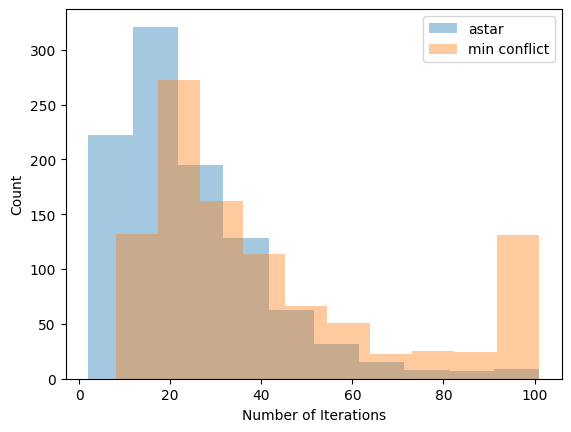

Average Number of Iterations (A*): 24.424
Average Number of Iterations (Min-Conflict): 42.444
Convergence rate of Min-Conflict: 87.4%


In [46]:
plt.hist(a_s, alpha = 0.4, label = "astar")
plt.hist(mc_s, alpha = 0.4, label = "min conflict")
plt.legend()
plt.xlabel('Number of Iterations')
plt.ylabel('Count')
plt.show()

a_average = sum(a_s) / N
mc_average = sum(mc_s) / N
print('Average Number of Iterations (A*): ' + str(a_average))
print('Average Number of Iterations (Min-Conflict): ' + str(mc_average))

num_conv_mc = N - mc_s.count(101)
print('Convergence rate of Min-Conflict: ' + str(num_conv_mc / N * 100) + '%')

In [38]:
pf, bt_breaker = bt_dfs(8, True)
print('Average number of iterations: ' + str(bt_breaker)) #No need for averaging; same solution every time
link_maker(pf)


found [0, 4, 7, 5, 2, 6, 1, 3]
Average number of iterations: 876


'https://lichess.org/editor/Q7/6Q1/4Q3/7Q/1Q6/3Q4/5Q2/2Q5_w_-_-_0_1?color=white'

In [39]:
bfs_iterations = []
N = 10 #takes so long that we need less iterations
for i in range(N):
    pf, bfs_breaker = bfs(8, True)
    bfs_iterations.append(bfs_breaker)

bfs_average = sum(bfs_iterations) / N
print('Average number of iterations: ' + str(bfs_average))
link_maker(pf)


found [0, 6, 3, 5, 7, 1, 4, 2]
found [6, 0, 2, 7, 5, 3, 1, 4]
found [2, 7, 3, 6, 0, 5, 1, 4]
found [1, 7, 5, 0, 2, 4, 6, 3]
found [2, 7, 3, 6, 0, 5, 1, 4]
found [3, 5, 0, 4, 1, 7, 2, 6]
found [7, 1, 3, 0, 6, 4, 2, 5]
found [0, 6, 4, 7, 1, 3, 5, 2]
found [0, 4, 7, 5, 2, 6, 1, 3]
found [2, 0, 6, 4, 7, 1, 3, 5]
Average number of iterations: 13248.1


'https://lichess.org/editor/1Q6/5Q2/Q7/6Q1/3Q4/7Q/2Q5/4Q3_w_-_-_0_1?color=white'